In [1]:
import sys
!{sys.executable} -m pip uninstall smi-analysis --yes
!{sys.executable} -m pip install git+https://github.com/gfreychet/smi-analysis.git

Found existing installation: smi-analysis 0.1.0.post70+g87cab36
Uninstalling smi-analysis-0.1.0.post70+g87cab36:
  Successfully uninstalled smi-analysis-0.1.0.post70+g87cab36
  Cloning https://github.com/gfreychet/smi-analysis.git to c:\users\at280565\appdata\local\temp\pip-req-build-k0zwph_e
  Resolved https://github.com/gfreychet/smi-analysis.git to commit 87cab36948499bc82bfef49101843bfc13014bb7
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for smi-analysis: started
  Running setup.py install for smi-analysis: finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/gfreychet/smi-analysis.git 'C:\Users\AT280565\AppData\Local\Temp\pip-req-build-k0zwph_e'
  DEPRECATION: smi-analysis is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: C:\dev\sw\envs3\env_metrocarac\Scripts\python.exe -m pip install --upgrade pip


# Visualize the structure of the .h5 file with NeXus standard

The first step is to visualize the structure of the file and all the data / metadata it contains.
There are three types of element :

    - Groups (red) : you can view them as a directory, it can contain other groups, dataset or attributes
    - Datasets (blue) : you can view them as a file, it can only contain attributes
    - Attributes (green) : you can view them as metadata, it cannot contain anything and gives additional information
    
To do so you just have to change the absolute path of the .h5 file you want to use. Don't forget to put two "\" if you use them, if you use "/" no modification is necessary. It is the only variable you need to change here

In [3]:
%matplotlib notebook

import os
import h5py
from colorama import Fore, Style
import matplotlib.pyplot as plt
import numpy as np
from smi_analysis import SMI_beamline


file_path = 'C:\\Users\\AT280565\\PycharmProjects\\EdfToHdf5\\data\\NeXus_files\\sample0_saxs_2024-11-06T08-15-55.h5'

#file_path = 'C:\\Users\\AT280565\\PycharmProjects\\EdfToHdf5\\data\\NeXus_files\\sample11_waxs_2024-11-05T17-03-21.h5'
#file_path = "C:\\Users\\AT280565\\PycharmProjects\\EdfToHdf5\\data\\NeXus_files\\sample12_waxs_2024-11-05T17-21-11.h5"

#file_path = "C:\\Users\\AT280565\\PycharmProjects\\EdfToHdf5\\data\\NeXus_files\\sample_sow7-143_saxs_2024-11-06T08-30-30.h5"

# directory_path = 'C:\\Users\\AT280565\\PycharmProjects\\EdfToHdf5\\NeXusFiles\\'
# file_name = "sample_sow7-143_saxs_2024-11-04T14-26-18.h5"



def explore_file(group, level=0):
    indent = "|  " * level
    for key in group.keys():
        item = group[key]
        if isinstance(item, h5py.Group):
            print(f"{indent}{Fore.RED}Group : {key}{Style.RESET_ALL}")
            explore_file(item, level + 1)
        elif isinstance(item, h5py.Dataset):
            print(f"{indent}{Fore.CYAN}Dataset : {key}{Style.RESET_ALL}")
            if item.attrs:
                print(f"{indent}  {Fore.GREEN}Attributes : {key}{Style.RESET_ALL}")
                for key_attribute, item_attribute in item.attrs.items():
                    print(f"{indent}    - {key_attribute} : {item_attribute}")
            
file = h5py.File(file_path, 'r')
explore_file(file)
file.close()

Group : entry
|  Group : data
|  |  Dataset : data
|  |    Attributes : data
|  |      - EX_required : true
|  |      - signal : 1
|  |      - type : NX_CHAR
|  Dataset : definition
|    Attributes : definition
|      - EX_required : true
|      - type : NX_CHAR
|  Dataset : end_time
|    Attributes : end_time
|      - EX_required : false
|      - type : NX_DATE_TIME
|  Dataset : experiment_type
|    Attributes : experiment_type
|      - EX_required : true
|      - type : NX_CHAR
|  Group : instrument
|  |  Group : aperture
|  |  |  Dataset : shape
|  |  |    Attributes : shape
|  |  |      - EX_required : false
|  |  |      - type : NX_CHAR
|  |  |  Dataset : x_gap
|  |  |    Attributes : x_gap
|  |  |      - EX_required : false
|  |  |      - type : NX_FLOAT
|  |  |      - units : m
|  |  |  Dataset : y_gap
|  |  |    Attributes : y_gap
|  |  |      - EX_required : false
|  |  |      - type : NX_FLOAT
|  |  |      - units : m
|  |  Group : detector
|  |  |  Dataset : beam_center_x
| 

# Extract a dataset into a python variable

If you want to extract a dataset and one of it's attribute (for example the wavelength and it's unit) you simply have to follow the folowing model :

In [4]:
# Open your file
file = h5py.File(file_path, 'r')

# Extract the dataset by specifying its path and its attribute by using the method attrs
dataset_wavelength = file["entry/instrument/monochromator/wavelength"]
print(np.shape(dataset_wavelength))
attributes_wavelength = dataset_wavelength.attrs

# Extract the value by copying its content into another variable
float_wavelength = dataset_wavelength[()]
str_unit = attributes_wavelength["units"]
print(f"Wavelength : {float_wavelength} {str_unit}")

file.close()

()
Wavelength : 0.1541889 nm


# Plot experimental data

To plot experimental data you have to extract the data set with the method that was just described. But since this data is probably an array of point, you have to put ":" instead of "()" which is for scalars.

After that you only have to plot the data using matplotlib.pyplot

<IPython.core.display.Javascript object>


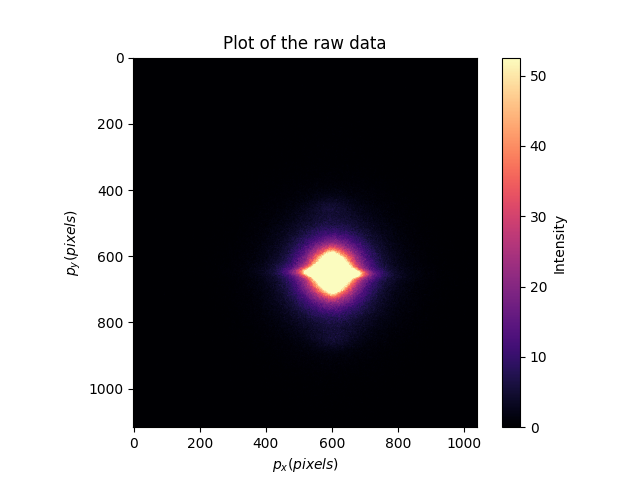

In [5]:
# Open your file
file = h5py.File(file_path, 'r')

# Extract the dataset
dataset_raw = file["entry/data/data"]

# Extract the array by copying its content into another variable
array_raw = dataset_raw[:]

# Plot using matplotlib
fig, ax = plt.subplots()
plot = ax.imshow(array_raw, vmin=0, vmax=np.percentile(array_raw, 99), cmap="magma")

ax.set_title("Plot of the raw data")
ax.set_xlabel("$p_{x} (pixels)$")
ax.set_ylabel("$p_{y} (pixels)$")

cbar = plt.colorbar(plot, ax=ax)
cbar.set_label("Intensity")

file.close()

# Simple processing of the raw data

To start we can do a simple processing of the raw data. For example we can sum the value on a strip of pixel that goes accros the luminous spot.

If you want to change the thickness of the strip you can change the parameters y_min and y_max

<IPython.core.display.Javascript object>


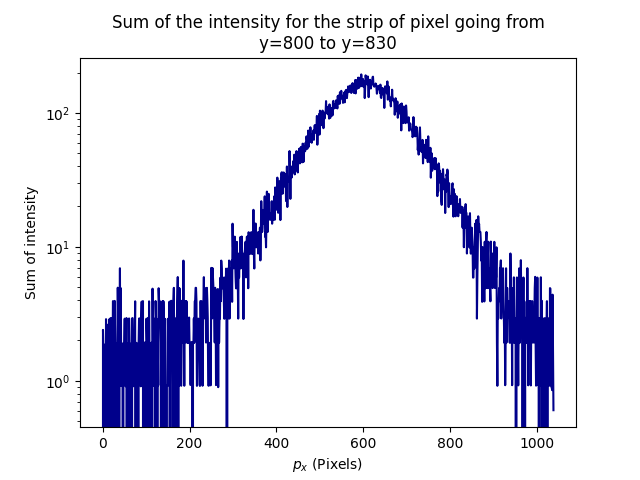

In [6]:
# We copy the strips of interest in new variables
y_min = 800
y_max = 830
array_raw_strip1 = array_raw[y_min:y_max:1, :]

# We sum the value of the pixel of coordinate (x, y_min) to (x, y_max) for all x
list_sum_strip1 = np.sum(array_raw_strip1, axis=0)

# We plot the result
fig, ax = plt.subplots()
plot = ax.plot(list_sum_strip1, color="darkblue")

ax.set_title("Sum of the intensity for the strip of pixel going from\n" \
             f"y={y_min} to y={y_max}")
ax.set_xlabel("$p_{x}$ (Pixels)")
ax.set_ylabel("Sum of intensity")
ax.set_yscale("log")

# Extraction of the necessary data from the file

Here we are going to define a function that will extract all values required by the python package smi_analysis.

You don't have to change anything here

In [7]:
def extract_parameters(file_path):
    dict_parameters = {
        "beam stop": [[0, 0]]
    }
    
    file = h5py.File(file_path, 'r')
    def extract_fromH5(path, type="dataset", attribute_name=None):
        dataset = file[path]
        attributes = dataset.attrs
        if type == "dataset" and np.shape(dataset) == ():
            return dataset[()]
        elif type == "dataset" and np.shape(dataset) != ():
            return dataset[:]
        elif type == "attribute" and attribute_name in attributes.keys():
            return attributes(attribute_name)
        else:
            print(f"error while extracting from {path}")
            return None
        
    # Name of the detector
    if "dectris eiger2 si 1m, s/n e-02-0299" in str(extract_fromH5("entry/instrument/detector/name")):
        dict_parameters["detector"] = "Eiger1M_xeuss"
    elif "dectris eiger2 r 500k, s/n e-01-0326" in str(extract_fromH5("entry/instrument/detector/name")):
        dict_parameters["detector"] = "Eiger500k_xeuss"
    
    # Raw data from the experiment
    raw_data = extract_fromH5("entry/data/data")
    dict_parameters["data"] = [raw_data]
    
    # Geometry of the experiment
    geometry = extract_fromH5("entry/instrument/detector/geometry")
    geometry = str(geometry).strip("b").strip("'").title()
    dict_parameters["geometry"] = str(geometry)
    
    # Center of the beam along the x axis
    beam_center_x = extract_fromH5("entry/instrument/detector/beam_center_x")
    beam_center_y = extract_fromH5("entry/instrument/detector/beam_center_y")
    dict_parameters["beam center"] = [beam_center_x, beam_center_y]
    
    # Sample-detector distance
    sample_detector_distance = extract_fromH5("entry/instrument/detector/distance")
    dict_parameters["distance"] = sample_detector_distance
    
    # Incident wavelength
    wavelength = extract_fromH5("entry/instrument/monochromator/wavelength")
    dict_parameters["wavelength"] = wavelength * 1e-9
    
    # Incident angle
    alpha = np.deg2rad(0.25)
    dict_parameters["alpha"] = alpha
    
    # Rotations of the detector along the x / y / z axis respectively
    rotation_1 = -extract_fromH5("entry/instrument/detector/pitch")
    rotation_2 = -extract_fromH5("entry/instrument/detector/yaw")
    rotation_3 = -extract_fromH5("entry/instrument/detector/roll")
    dict_parameters["detector rotation"] = [[rotation_1, rotation_2, rotation_3]]
    
    # Name of the sample
    sample_name = extract_fromH5("entry/sample/name")
    dict_parameters["sample name"] = sample_name
    dict_parameters["sample name"] = sample_name
    return dict_parameters

# Extraction and plotting of the data in q-space

To extract the parameters necessary to compute the data in q-space, you have to do the following process.

You can adjust the methods used according do the experiment type

<IPython.core.display.Javascript object>


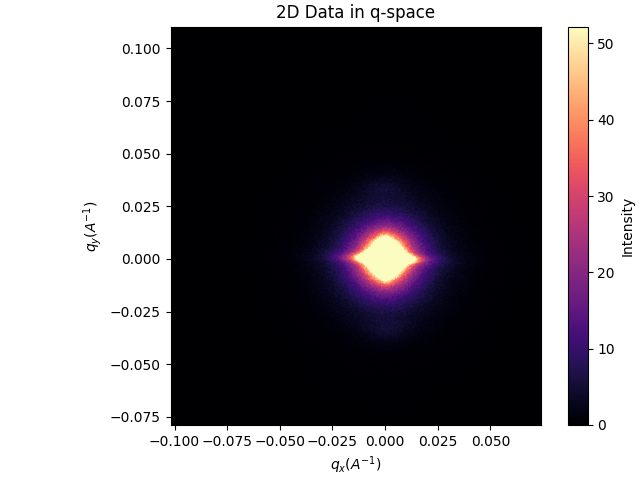

In [8]:
# We extract the parameters thanks to the function we defined
parameters = extract_parameters(file_path)
parameters["geometry"]='Transmission'
SMI_waxs = SMI_beamline.SMI_geometry(geometry=parameters["geometry"],
                                     sdd=parameters["distance"],
                                     wav=parameters["wavelength"],
                                     alphai=parameters["alpha"],
                                     center=parameters["beam center"],
                                     bs_pos=parameters["beam stop"],
                                     detector=parameters["detector"],
                                     det_angles=parameters["detector rotation"])

# We open and process the data thanks to the SMI_analysis package
# First we process the data to have it in the q-space
SMI_waxs.open_data_db(parameters["data"])
SMI_waxs.masks = np.logical_not(np.ones(np.shape(SMI_waxs.imgs)))
SMI_waxs.calculate_integrator_trans(parameters["detector rotation"])
SMI_waxs.stitching_data()

fig, ax = plt.subplots(layout="constrained")
ax.set_title('2D Data in q-space')
cplot = ax.imshow(SMI_waxs.img_st,
           extent=[SMI_waxs.qp[0], SMI_waxs.qp[-1], SMI_waxs.qz[0], SMI_waxs.qz[-1]],
           vmin=0,
           vmax=np.percentile(SMI_waxs.img_st[~np.isnan(SMI_waxs.img_st)], 99),
           cmap="magma")
ax.set_xlabel('$q_{x} (A^{-1}$)')
ax.set_ylabel('$q_{y} (A^{-1}$)')
cbar = plt.colorbar(cplot, ax=ax)
cbar.set_label("Intensity")
plt.show()

# Integration following an horizontal or vertical section

To integrate over an horizontal or vertical section you have to do he following.

You can change the parameters qx_min, qx_max, qy_min, qy_max to change the interval of integration

<IPython.core.display.Javascript object>


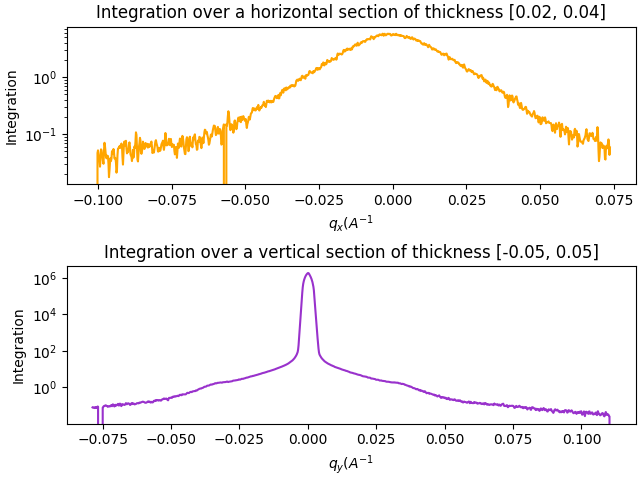

In [9]:
# Horizontal integration
qy_min = 0.02
qy_max = 0.04

SMI_waxs.horizontal_integration(q_per_range=[qy_min, qy_max])
q_horizontal, I_horizontal = SMI_waxs.q_hor, SMI_waxs.I_hor

# Vertical integration
qx_min = -0.05
qx_max = 0.05

SMI_waxs.vertical_integration(q_par_range=[qx_min, qx_max])
q_vertical, I_vertical = SMI_waxs.q_ver, SMI_waxs.I_ver

fig, ax = plt.subplots(2, 1, layout="constrained")
ax[0].plot(q_horizontal, I_horizontal, color="orange")
ax[0].set_title(f"Integration over a horizontal section of thickness [{qy_min}, {qy_max}]")
ax[0].set_xlabel("$q_{x} (A^{-1}$")
ax[0].set_ylabel("Integration")
ax[0].set_yscale("log")

ax[1].plot(q_vertical, I_vertical, color="darkorchid")
ax[1].set_title(f"Integration over a vertical section of thickness [{qx_min}, {qx_max}]")
ax[1].set_xlabel("$q_{y} (A^{-1}$")
ax[1].set_ylabel("Integration")
ax[1].set_yscale("log")

plt.show()

# Radial averaging of the data
To get the radial average of the intensity in q-space, you can do the following.

You can change the radial and azimuthal range

<IPython.core.display.Javascript object>


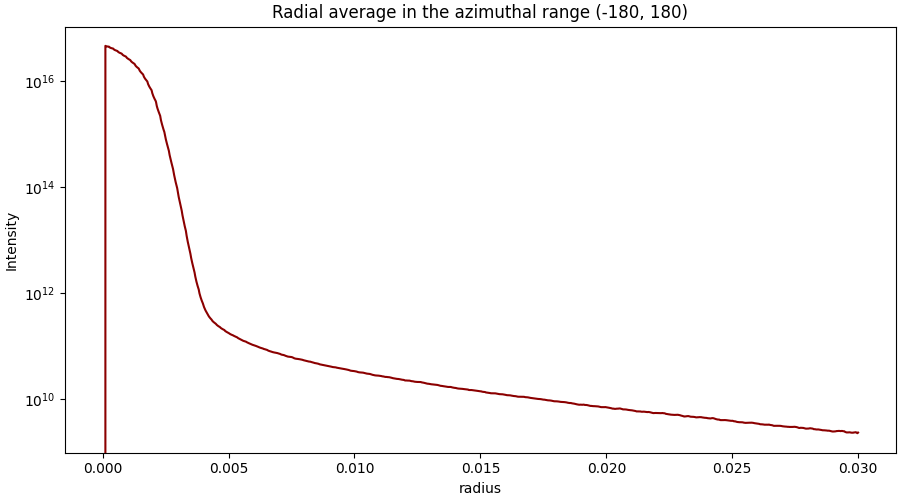

In [14]:
# You can modify the following
radial_min = 0.000
radial_max = 0.03

azimuthal_min = -180
azimuthal_max = 180
number_point = 2000

# We then compute the radial average
SMI_waxs.radial_averaging(radial_range=[radial_min, radial_max],
                          azimuth_range=[azimuthal_min, azimuthal_max], 
                          npt=number_point)
q, I = SMI_waxs.q_rad, SMI_waxs.I_rad

fig, ax = plt.subplots(figsize=(9, 5), layout="constrained")
ax.plot(q, I, color="darkred")
ax.set_title(f"Radial average in the azimuthal range {azimuthal_min, azimuthal_max}")
ax.set_xlabel("radius")
ax.set_ylabel("Intensity")
ax.set_yscale("log")

plt.show()

# Batch processing of several files

To process multiple files in one batch, please provide the absolute path of the directory.

If you would like to save your reduced data, please set the variable do_save to True and provide the absolute path directory that will store the reduced data

<IPython.core.display.Javascript object>


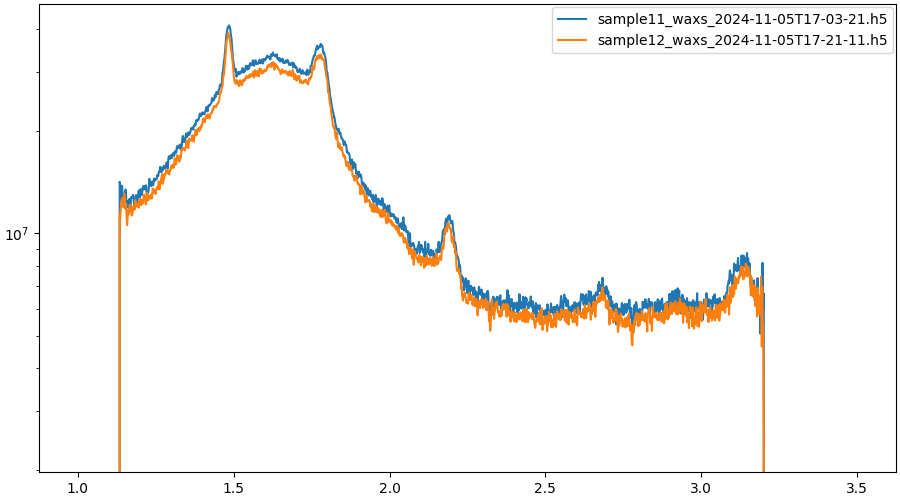

C:\Users\AT280565\PycharmProjects\EdfToHdf5\data\to_process\sample11_waxs_2024-11-05T17-03-21.h5
C:\Users\AT280565\PycharmProjects\EdfToHdf5\data\to_process\sample12_waxs_2024-11-05T17-21-11.h5


In [15]:
load_directory = "C:\\Users\\AT280565\\PycharmProjects\\EdfToHdf5\\data\\to_process\\"

do_save = True
save_directory = "C:\\Users\\AT280565\\PycharmProjects\\EdfToHdf5\\data\\Processed_files\\"

fig, ax = plt.subplots(figsize=(9, 5), layout="constrained")
for file in os.listdir(load_directory):
    print(load_directory+file)
    parameters = extract_parameters(load_directory+file)
    SMI_waxs = SMI_beamline.SMI_geometry(geometry=parameters["geometry"],
                                     sdd=parameters["distance"],
                                     wav=parameters["wavelength"],
                                     alphai=parameters["alpha"],
                                     center=parameters["beam center"],
                                     bs_pos=parameters["beam stop"],
                                     detector=parameters["detector"],
                                     det_angles=parameters["detector rotation"])
    
    SMI_waxs.open_data_db(parameters["data"])
    SMI_waxs.masks = np.logical_not(np.ones(np.shape(SMI_waxs.imgs)))
    SMI_waxs.calculate_integrator_trans(parameters["detector rotation"])
    SMI_waxs.stitching_data()
    
    SMI_waxs.radial_averaging(radial_range=[1, 3.5],azimuth_range=[-180, 180], npt=2000)
    
    ax.plot(SMI_waxs.q_rad, SMI_waxs.I_rad, label=file)

ax.set_yscale("log")
fig.legend()
if do_save:
    plt.savefig(save_directory+"batch_process.png")
else:
    plt.show()